In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, FixedLocator, ScalarFormatter, MultipleLocator

import seaborn as sns

c:\Users\P\anaconda3\envs\SYLAS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

file_name1 = 'CondGANOpenMeterprivat.parquet'; syngan = pd.read_parquet(os.path.join(folder_path2, file_name1))
file_name2 = 'ddpm_om_privat.parquet'; synddpm = pd.read_parquet(os.path.join(folder_path2, file_name2))
file_name3 = 'privat_test_origData.parquet'; original = pd.read_parquet(os.path.join(folder_path2, file_name3))

In [4]:
def melt_dataframe(original_df):
    # Reset index and melt the dataframe
    melted_df = original_df.reset_index().melt(id_vars='index', var_name='id', value_name='Value')
    
    # Rename the columns
    melted_df.columns = ['datetime', 'id', 'Value']
    
    return melted_df

original_melt = melt_dataframe(original)
syngan_melt = melt_dataframe(syngan)
synddpm_melt = melt_dataframe(synddpm)

### Linear y-Axis

C:\Users\P\AppData\Local\Temp\ipykernel_12888\96322997.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/10**magnitude:.1f}' for tick in ax.get_yticks()])


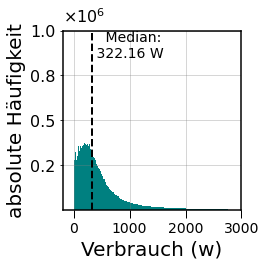

In [21]:
def plot_histogram(df, column, figsize=(10, 6), xlabel='Verbrauch (w)', ylabel='absolute Häufigkeit',
                   xlim=(-200, 3000), xtick_fontsize=14, ytick_fontsize=16, xlabel_fontsize=20, ylabel_fontsize=20,
                   tick_length=8, tick_width=1.0, color='#008080', edgecolor='none'):
    """
    Plots a histogram with customized settings including figure size, axis labels, tick sizes, and color.

    Parameters:
    - df: DataFrame containing the data.
    - column: The column name in df to be plotted.
    - figsize: Tuple indicating figure size.
    - xlabel, ylabel: Labels for the X and Y axes.
    - xlim: Tuple indicating the limits for the X axis.
    - xtick_fontsize, ytick_fontsize: Font size for the tick labels on the X and Y axes.
    - xlabel_fontsize, ylabel_fontsize: Font size for the X and Y axis labels.
    - tick_length, tick_width: Length and width of the ticks.
    - color: Color of the histogram bars.
    """
    plt.figure(figsize=figsize)
    sns.histplot(df[column], bins=5000, log_scale=False, color=color, edgecolor='none', alpha=1)
    
    plt.xlabel(xlabel, fontsize=xlabel_fontsize)
    plt.ylabel(ylabel, fontsize=ylabel_fontsize)
    plt.xlim(*xlim)
    plt.ylim(1, 1000000)
    #plt.yscale('log')

    ax = plt.gca()
    ax.grid(True, color='grey', alpha=0.4)

    ax.yaxis.set_major_locator(MultipleLocator(250000))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
    
    ax.tick_params(axis='x', which='both', length=tick_length, width=tick_width, labelsize=xtick_fontsize)
    ax.tick_params(axis='y', which='major', labelsize=ytick_fontsize)

    magnitude = np.floor(np.log10(max(ax.get_yticks()))).astype(int)
    ax.set_yticklabels([f'{tick/10**magnitude:.1f}' for tick in ax.get_yticks()])

    ax.annotate(f'$\\times 10^{magnitude}$', xy=(0, 1), xycoords=('axes fraction', 'axes fraction'),
                xytext=(0, 5), textcoords='offset points', ha='left', va='bottom', fontsize=ytick_fontsize)
    
    
    median_length = df['Value'].median()
    median_length2 = median_length
    
    plt.axvline(median_length2, color='black', linestyle='--', linewidth=2)
    plt.text(median_length2 - 1.5, plt.ylim()[1] - 150000, f'   Median: \n {median_length2:.2f} W', fontsize=14, color='black', fontweight='medium')

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set your desired linewidth here
        spine.set_edgecolor('k')  # Set your desired color here


    plt.tight_layout()
    plt.show()
    
plot_histogram(original_melt, 'Value', figsize=(3.8, 3.8))

### log y-Axis

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter

def plot_histogram(df, column, figsize=(10, 6), xlabel='Verbrauch (W)', ylabel='absolute Häufigkeit',
                   xlim=(-4000, 20000), xtick_fontsize=14, ytick_fontsize=16, xlabel_fontsize=20, ylabel_fontsize=20,
                   tick_length=8, tick_width=1.0, color='#008080', edgecolor='none', title='Title'):
    """
    Plots a histogram with customized settings including figure size, axis labels, tick sizes, and color.

    Parameters:
    - df: DataFrame containing the data.
    - column: The column name in df to be plotted.
    - figsize: Tuple indicating figure size.
    - xlabel, ylabel: Labels for the X and Y axes.
    - xlim: Tuple indicating the limits for the X axis.
    - xtick_fontsize, ytick_fontsize: Font size for the tick labels on the X and Y axes.
    - xlabel_fontsize, ylabel_fontsize: Font size for the X and Y axis labels.
    - tick_length, tick_width: Length and width of the ticks.
    - color: Color of the histogram bars.
    """
    plt.figure(figsize=figsize)
    sns.histplot(df[column], bins=5000, log_scale=False, color=color, edgecolor='none', alpha=1)
    
    plt.xlabel(xlabel, fontsize=xlabel_fontsize)
    plt.ylabel(ylabel, fontsize=ylabel_fontsize)
    plt.xlim(*xlim)
    plt.ylim(1, None)  # Set the minimum y-limit to 1 for a log scale, but leave the maximum open
    plt.yscale('log')

    ax = plt.gca()
    ax.grid(True, color='grey', alpha=0.4)

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
    ax.tick_params(axis='x', which='both', length=tick_length, width=tick_width, labelsize=xtick_fontsize)
    ax.tick_params(axis='y', which='major', labelsize=ytick_fontsize)

    # magnitude = np.floor(np.log10(max(ax.get_yticks()))).astype(int)
    # ax.set_yticklabels([f'{tick/10**magnitude:.5f}' for tick in ax.get_yticks()])

    # ax.annotate(f'$\\times 10^{magnitude}$', xy=(0, 1), xycoords=('axes fraction', 'axes fraction'),
    #             xytext=(0, 5), textcoords='offset points', ha='left', va='bottom', fontsize=ytick_fontsize)
    
    median_length = df[column].median()
    plt.axvline(median_length, color='black', linestyle='--', linewidth=2)
    
    ylim = plt.ylim()

    percentage_y = ylim[0] + 0.081 * (ylim[1] - ylim[0])
    
    plt.text(median_length - 2.5, percentage_y, f'   Median: \n {median_length:.2f} W', fontsize=14, color='black', fontweight='medium')

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set your desired linewidth here
        spine.set_edgecolor('k')  # Set your desired color here

    color2 = color
    plt.title(title, fontsize=22, fontweight='bold', color=color2)
    plt.tight_layout()
    plt.show()
    

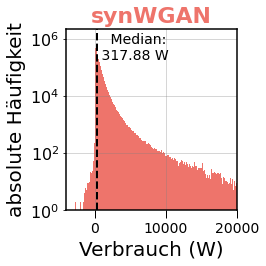

In [85]:
plot_histogram(syngan_melt, 'Value', color='#ee746b', figsize=(3.8, 3.8), title='synWGAN')

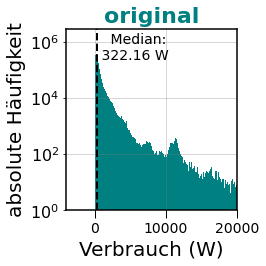

In [86]:
plot_histogram(original_melt, 'Value', figsize=(3.8, 3.8), title='original')

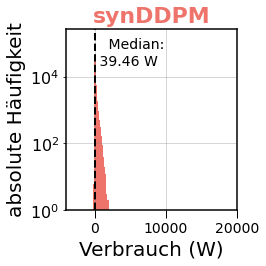

In [87]:
plot_histogram(synddpm_melt, 'Value', color='#ee746b', figsize=(3.8, 3.8), title='synDDPM')